<a href="https://colab.research.google.com/github/matildecanete/proyecto2/blob/main/Proyecto2_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
df = pd.read_csv('/content/customer_data.csv')
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [4]:
df.drop(columns= "id", inplace=True) #Se elimina columna "id" ya que no aporta información útil para el análisis o modelado de datos.

In [5]:
df.shape

(100000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


Tipo de columna:

- age : Numérica
- gender : Nominal
- income : Numérica
- education : Nominal
- region : Nominal
- loyalty_status : Ordinal
- purchase_frequency : Ordinal
- purchase_amount : Numérica
- product_category : Nominal
- promotion_usage : Numérica
- satisfaction_score : Numérica

In [7]:
df.isna().sum()

age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

>No hay valores faltantes.

In [8]:
df.duplicated().sum()

0

>No hay valores duplicados.

In [9]:
df.describe()

,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,49.000000,50000.000000,26204.000000,1.000000,10.000000


Identificar inconsistencias en los datos para los valores numéricos.

In [10]:
print(df['age'].unique(), end = "\n\n")
print(df['income'].value_counts(), end = "\n\n")
print(df['purchase_amount'].value_counts(), end = "\n\n")
print(df['promotion_usage'].value_counts(), end = "\n\n")
print(df['satisfaction_score'].value_counts(), end = "\n\n")

[27 29 37 30 31 38 32 24 28 35 21 33 25 22 34 36 40 23 39 20 26 44 19 41
 18 17 42 43 45 16 15 47 13 14 48 46 49 12]

income
39596    12
28944    10
12803    10
36828    10
21832     9
         ..
47076     1
44614     1
14934     1
45093     1
35207     1
Name: count, Length: 40003, dtype: int64

purchase_amount
8368     19
3800     17
11464    17
2831     17
3696     17
         ..
18222     1
18773     1
1980      1
19211     1
18104     1
Name: count, Length: 18902, dtype: int64

promotion_usage
0    69920
1    30080
Name: count, dtype: int64

satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64



>No hay valores inconsistentes en las columnas numéricas.

Identificar inconsistencias en los datos para los valores categóricos.

In [11]:
print(df['gender'].value_counts(), end = "\n\n")
print(df['education'].value_counts(), end = "\n\n")
print(df['region'].value_counts(), end = "\n\n")
print(df['loyalty_status'].value_counts(), end = "\n\n")
print(df['purchase_frequency'].value_counts(), end = "\n\n")
print(df['product_category'].value_counts(), end = "\n\n")

gender
Female    50074
Male      49926
Name: count, dtype: int64

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64



>No hay valores inconsistentes en las columnas categóricas.

Columna "satisfaction_score".

In [12]:
df["satisfaction_score"].value_counts()

satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64

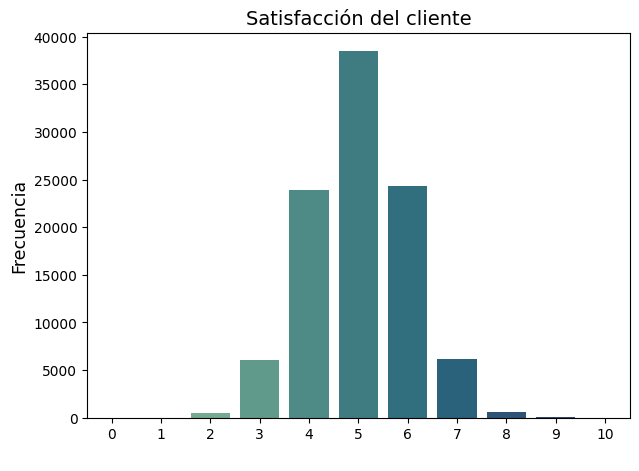

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="satisfaction_score", hue="satisfaction_score", palette='crest', legend=False)
plt.title("Satisfacción del cliente", size=14)
plt.xlabel(" ")
plt.ylabel("Frecuencia", size=12.5)
plt.show()

**Nueva columna como objetivo.**

- La columna "satisfaction_score" presenta valores del 1 al 10.
- Se procederá a crear una nueva columna como objetivo en base a los valores de "satisfaction_score", esto con el objetivo de que la nueva columna sea de clase binaria.
- Se va a considerar del 0 al 4 como "Insatisfecho" (0) y del 5 al 10 como "Satisfecho" (1).


In [14]:
df = df.assign(total_score=lambda x: x['satisfaction_score'].apply(lambda y: 0 if y <= 4 else 1))
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,total_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,1
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,1
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,1
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,1
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,1


In [15]:
df.shape

(100000, 12)

Visuales univariantes para el objetivo y todas las características.

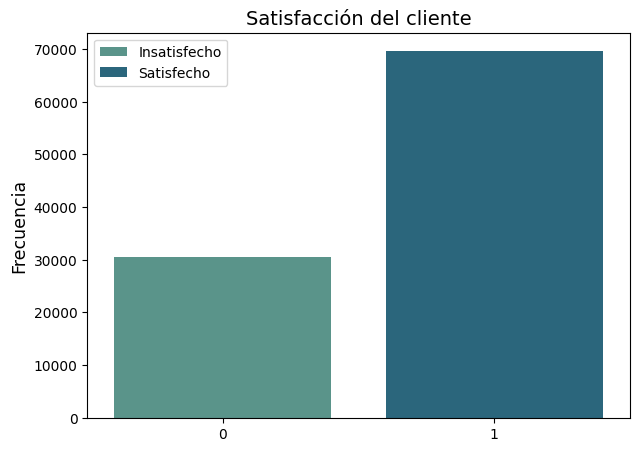

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="total_score", hue="total_score", palette='crest', legend=False)
plt.title("Satisfacción del cliente", size=14)
plt.xlabel(" ")
plt.ylabel("Frecuencia", size=12.5)
labels = ["Insatisfecho", "Satisfecho"]
plt.legend(labels)
plt.show()

In [17]:
promotion_by_score = df.groupby("promotion_usage")["total_score"].value_counts()
promotion_by_score

promotion_usage  total_score
0                1              48611
                 0              21309
1                1              20964
                 0               9116
Name: count, dtype: int64

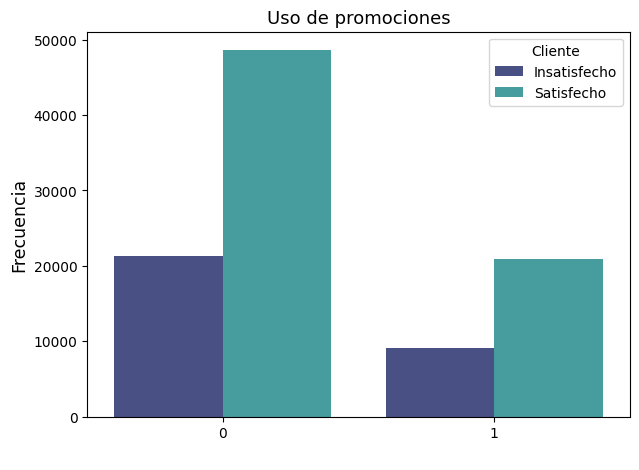

In [18]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="promotion_usage", hue="total_score", palette='mako')
plt.title("Uso de promociones", size=13)
plt.xlabel(" ")
plt.ylabel("Frecuencia" , size=12.5)
labels = ["Insatisfecho", "Satisfecho"]
plt.legend(labels, title="Cliente")
plt.show()

>El uso de promociones es bajo en general. Los clientes de la clase "Satisfecho" son los que menos las utilizan.

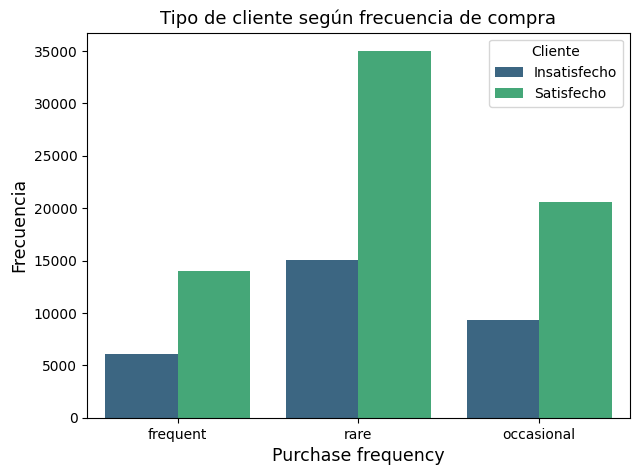

In [19]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="purchase_frequency", hue="total_score", palette='viridis')
plt.title("Tipo de cliente según frecuencia de compra", size=13)
plt.xlabel("Purchase frequency", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
labels = ["Insatisfecho", "Satisfecho"]
plt.legend(labels, title= "Cliente")
plt.show()

>En las tres categorías de frecuencia de compra, predominan los clientes de la clase "Satisfecho".

In [20]:
purchase_by_loyalty = df.groupby("loyalty_status")["purchase_frequency"].value_counts()
purchase_by_loyalty

loyalty_status  purchase_frequency
Gold            rare                   4974
                occasional             2932
                frequent               1992
Regular         rare                  30112
                occasional            18037
                frequent              11989
Silver          rare                  14933
                occasional             8917
                frequent               6114
Name: count, dtype: int64

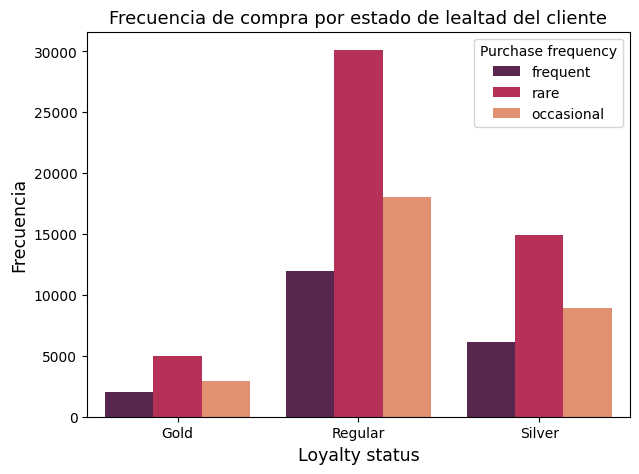

In [21]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="loyalty_status", hue="purchase_frequency", palette='rocket')
plt.title("Frecuencia de compra por estado de lealtad del cliente", size=13)
plt.xlabel("Loyalty status", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
labels = ["frequent", "rare", "occasional"]
plt.legend(labels, title= "Purchase frequency")
plt.show()

>Los clientes regulares destacan por encima de los demás en las tres categorías de frecuencia de compra.

In [22]:
df["gender"].value_counts()

gender
Female    50074
Male      49926
Name: count, dtype: int64

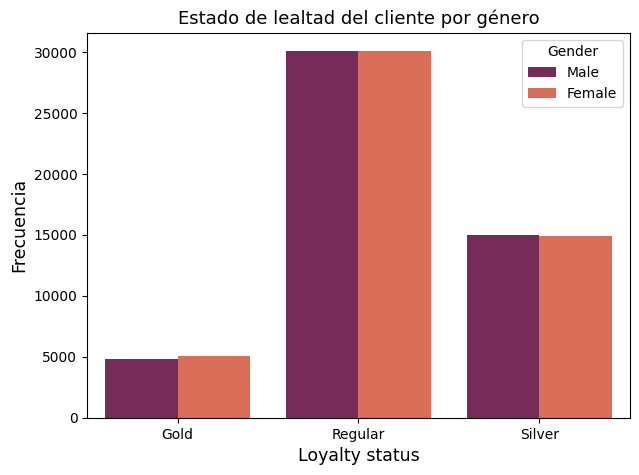

In [23]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="loyalty_status", hue="gender", palette='rocket')
plt.title("Estado de lealtad del cliente por género", size=13)
plt.xlabel("Loyalty status", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
plt.legend(title= "Gender")
plt.show()

>El estado de lealtad entre clientes de género masculino y femenino es equitativo en las tres categorías.

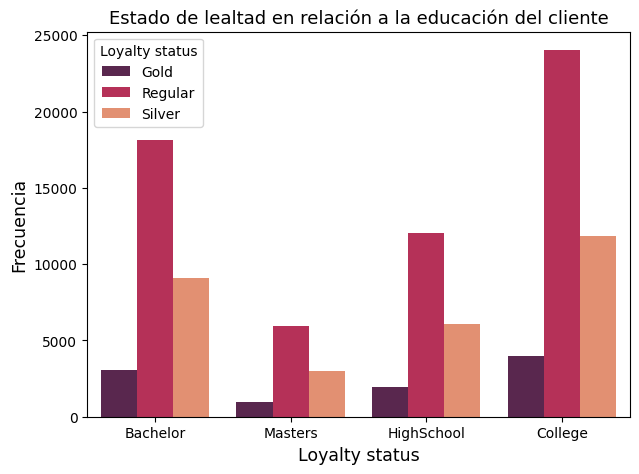

In [24]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="education", hue="loyalty_status", palette='rocket')
plt.title("Estado de lealtad en relación a la educación del cliente", size=13)
plt.xlabel("Loyalty status", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
plt.legend(title= "Loyalty status")
plt.show()

>El estado de lealtad "Regular" destaca en los cuatro niveles de educación. Los clientes con educación "College" sobresalen en las tres categorías de lealtad.

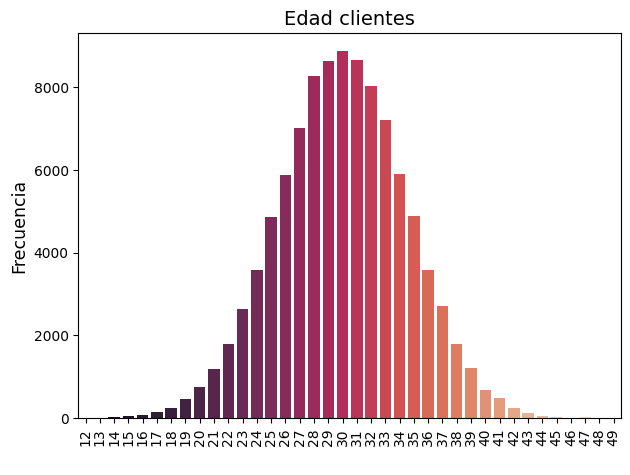

In [25]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="age", hue="age", palette='rocket', legend=False)
plt.title("Edad clientes", size=14)
plt.xlabel(" ")
plt.ylabel("Frecuencia", size=12.5)
plt.xticks(rotation=90)
plt.show()

>La mayor concentración de clientes se encuentra entre los 28 y 32 años.

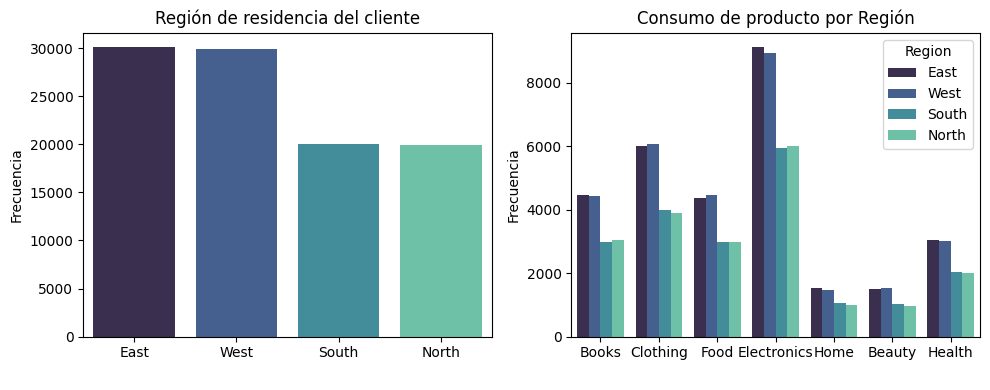

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(ax=axes[0], data=df, x='region', hue="region", palette='mako', legend=False)
axes[0].set_title("Región de residencia del cliente")
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Frecuencia")
sns.countplot(ax=axes[1], data=df, x="product_category", hue="region", palette='mako')
axes[1].set_title("Consumo de producto por Región")
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Frecuencia")
axes[1].legend(title="Region", loc="upper right")
plt.tight_layout()
plt.show()

>La mayoría de los clientes residen en las regiones "East" y "West". La frecuencia de compra, para cada categoría de producto, es similar entre las regiones.



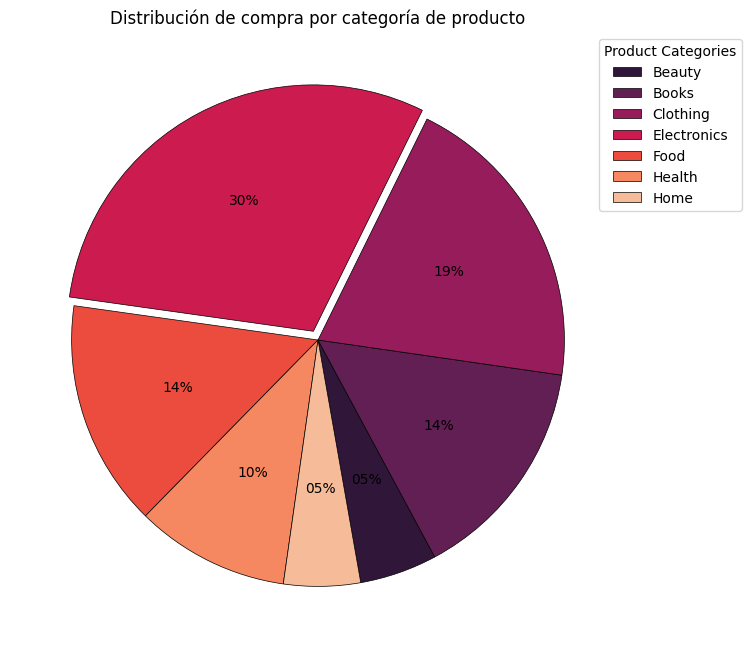

In [27]:
product_purchase = df.groupby('product_category')['purchase_amount'].sum()
plt.figure(figsize=(8, 8))
explotar = [0, 0, 0, 0.04, 0, 0, 0]
colors = sns.color_palette("rocket" , 7)
plt.pie(product_purchase, explode=explotar, autopct='%.2d%%', colors=colors, startangle=-80, wedgeprops={'edgecolor':'k' , 'lw':0.5})
plt.legend(product_purchase.index, title="Product Categories", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title("Distribución de compra por categoría de producto")
plt.show()

>La categoría de productos más consumida es "Electronics" (30%), seguida por "Clothing" (19%). Los productos de las categorías "Foods" y "Books" tienen un nivel de consumo del 14%, mientras que "Health" representa un 10%. Las categorías "Home" y "Beauty" tienen el mismo nivel de consumo, con un 5% cada una.

Boxplot

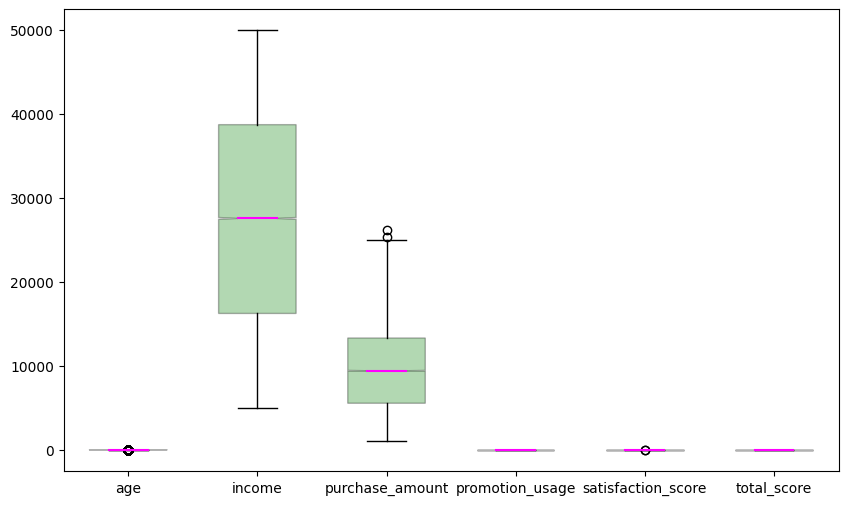

In [28]:
box_plot = df.select_dtypes(include="number")
fig, axes = plt.subplots(figsize = (10, 6))
plt.boxplot(box_plot, labels=box_plot.columns, widths = 0.6, notch = True, patch_artist=True ,
            medianprops = dict(linestyle='-', linewidth=1.5, color="magenta"),
                               boxprops = dict(linestyle='-', linewidth=1, facecolor ="green" , alpha = 0.3));
plt.show()

>Hay dos outliers en la columna "purchase_amount".

In [29]:
Q1 = df["purchase_amount"].quantile(0.25)
Q3 = df["purchase_amount"].quantile(0.75)
IQR = Q3 - Q1

In [30]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
outliers = df[(df["purchase_amount"] < lower_bound) | (df["purchase_amount"] > upper_bound)]
outliers

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,total_score
72791,32,Female,48213,College,North,Regular,rare,25406,Electronics,0,6,1
91489,34,Male,49710,Bachelor,North,Silver,frequent,26204,Clothing,0,6,1


In [32]:
df = df[(df["purchase_amount"] >= lower_bound) & (df["purchase_amount"] <= upper_bound)]
print("Outliers eliminados:", outliers.shape[0])

Outliers eliminados: 2


>Decido eliminar los outliers debido a que representan una proporción muy pequeña respecto al total de los datos, y además no tengo más contexto que justifique su inclusión.

Mapa de correlación

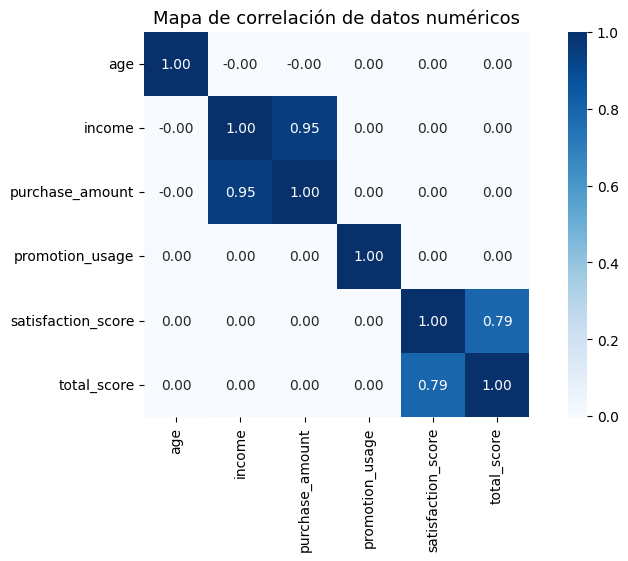

In [33]:
numeros_df = df.select_dtypes(include="number")
mapa_correlacion = numeros_df.corr()

plt.figure(figsize=(10 , 5))
sns.heatmap(mapa_correlacion, annot=True , square=True , cmap="Blues", fmt="0.2f")
plt.title("Mapa de correlación de datos numéricos" , fontsize = 13)
plt.show()

>La presencia de correlación entre la mayoría de las características es casi nula.

>La columna objetivo "total_score" presenta una alta correlación con la columna "satisfaction_score", ya que sus datos se derivan de "satisfaction_score".

>Las características "income" y "purchase_amount" muestran una correlación muy alta. Esto se debe a que reflejan la relación entre los ingresos anuales del cliente y el importe gastado por el cliente en cada compra. Es decir, a medida que los ingresos del cliente aumentan, su capacidad de consumo también tiende a aumentar.

>Considerando que el objetivo no tiene relación con ninguna característica, los modelos podrían tener un rendimiento bajo ya que no pueden diferenciar  entre las clases basándose en las características proporcionadas.



Se eliminará la columna "satisfaction_score" del DataFrame para evitar que el objetivo dependa únicamente de los datos de esta columna.








In [34]:
df.drop(columns = ["satisfaction_score"] , inplace=True)
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,total_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,1
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,1
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,1
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,1
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99998 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 99998 non-null  int64 
 1   gender              99998 non-null  object
 2   income              99998 non-null  int64 
 3   education           99998 non-null  object
 4   region              99998 non-null  object
 5   loyalty_status      99998 non-null  object
 6   purchase_frequency  99998 non-null  object
 7   purchase_amount     99998 non-null  int64 
 8   product_category    99998 non-null  object
 9   promotion_usage     99998 non-null  int64 
 10  total_score         99998 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.2+ MB


Codificación Ordinal columnas "education", "loyalty_status" y "purchase_frequency".

- Columna "education"

In [36]:
df["education"].value_counts()

education
College       39873
Bachelor      30278
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [37]:
df["education"].replace({"HighSchool" : 0 , "College" : 1 , "Bachelor" : 2 , "Masters" : 3} , inplace=True)
df["education"].value_counts()

education
1    39873
2    30278
0    20031
3     9816
Name: count, dtype: int64

- Columna "loyalty_status"

In [38]:
df["loyalty_status"].value_counts()

loyalty_status
Regular    60137
Silver     29963
Gold        9898
Name: count, dtype: int64

In [39]:
df["loyalty_status"].replace({"Regular" : 0 , "Silver" : 1 , "Gold" : 2} , inplace=True)
df["loyalty_status"].value_counts()

loyalty_status
0    60137
1    29963
2     9898
Name: count, dtype: int64

- Columna "purchase_frequency"

In [40]:
df["purchase_frequency"].value_counts()

purchase_frequency
rare          50018
occasional    29886
frequent      20094
Name: count, dtype: int64

In [41]:
df["purchase_frequency"].replace({"rare" : 0 , "occasional" : 1 , "frequent" : 2} , inplace=True)
df["purchase_frequency"].value_counts()

purchase_frequency
0    50018
1    29886
2    20094
Name: count, dtype: int64

###Modelos predictivos

Matriz de características, valor objetivo y validación del modelo.

In [42]:
y = df["total_score"]
X = df.drop(columns = "total_score")
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore' , sparse=False)

In [44]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [45]:
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [46]:
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [47]:
col_transformer.fit(X_train_full)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x79c82ffee410>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x79c82ffec850>)])

In [48]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)
X_val_processed = col_transformer.transform(X_val)

In [49]:
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)

All data in X_train_processed are float64
All data in X_test_processed are float64


Modelo Random Forest

In [138]:
rf = RandomForestClassifier(random_state=42)

In [139]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [140]:
rf_train_score = rf.score(X_train_processed, y_train).round(2)
print('Train:', rf_train_score)
rf_test_score = rf.score(X_test_processed, y_test).round(2)
print('Test:', rf_test_score)

Train: 1.0
Test: 0.67


Modelo Gradient Boosting

In [141]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_processed, y_train)

GradientBoostingClassifier()

In [142]:
gbc_train_score = gbc.score(X_train_processed, y_train).round(2)
print('Train:', gbc_train_score)
gbc_test_score = gbc.score(X_test_processed, y_test).round(2)
print('Test:', gbc_test_score)

Train: 0.7
Test: 0.7


Modelo Gradient Boosting con GridSearch

In [143]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3],
    'min_samples_leaf': [1, 2]}

In [144]:
grid_search = GridSearchCV(gbc, param_grid, cv=5, verbose=1, scoring='accuracy')

In [145]:
grid_search.fit(X_train_processed, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [146]:
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Accuracy: {best_accuracy.round(2)}")
print(f"Mejores parámetros: {best_params}")

Accuracy: 0.7
Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 100}


In [147]:
gbc_gs = GradientBoostingClassifier(max_depth = 3, min_samples_leaf = 2, n_estimators = 100)

In [148]:
gbc_gs.fit(X_train_processed, y_train)

GradientBoostingClassifier(min_samples_leaf=2)

In [149]:
gbc_gs_train_score = gbc_gs.score(X_train_processed, y_train).round(2)
print('Train:', gbc_gs_train_score)
gbc_gs_test_score = gbc_gs.score(X_test_processed, y_test).round(2)
print('Test:', gbc_gs_test_score)

Train: 0.7
Test: 0.7


Modelo Secuencial - Redes Neuronales

In [150]:
input_shape = X_train_processed.shape[1]
input_shape

20

In [151]:
model = Sequential()

model.add(Dense(19,
                input_dim = input_shape,
                activation = 'relu'))

model.add(Dense(10,
                activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [152]:
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

In [153]:
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_val_processed , y_val),
                    epochs=10)

Epoch 1/10
2000/2000 [==============================] - 6s 2ms/step - loss: 0.6195 - accuracy: 0.6928 - val_loss: 0.6181 - val_accuracy: 0.6936
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6154 - accuracy: 0.6950 - val_loss: 0.6171 - val_accuracy: 0.6936
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6149 - accuracy: 0.6950 - val_loss: 0.6178 - val_accuracy: 0.6936
Epoch 4/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6147 - accuracy: 0.6950 - val_loss: 0.6173 - val_accuracy: 0.6936
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6143 - accuracy: 0.6950 - val_loss: 0.6178 - val_accuracy: 0.6936
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6142 - accuracy: 0.6950 - val_loss: 0.6180 - val_accuracy: 0.6936
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6140 - accuracy: 0.6950 - val_loss: 0.6178 - val_accuracy:

In [154]:
train_loss, train_accuracy = model.evaluate(X_train_processed , y_train, verbose=0)
print('Train loss: {:.2f} Train accuracy: {:.2f}'.format(train_loss, train_accuracy))
test_loss, test_accuracy = model.evaluate(X_val_processed , y_val, verbose=0)
print('Validation loss: {:.2f} Validation accuracy: {:.2f}'.format(test_loss, test_accuracy))

Train loss: 0.61 Train accuracy: 0.70
Validation loss: 0.62 Validation accuracy: 0.69


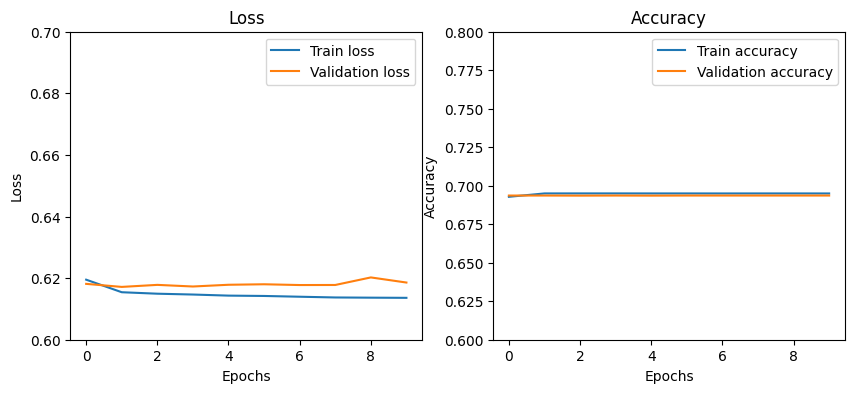

In [155]:
#Visualización loss y accuracy
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(history.history['loss'], label='Train loss')
axs[0].plot(history.history['val_loss'], label='Validation loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_ylim(0.6, 0.7)
axs[1].plot(history.history['accuracy'], label='Train accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim(0.6, 0.8)
axs[1].legend()

Modelo Secuencial con Dropout

In [156]:
model_dropout = Sequential()

model_dropout.add(Dense(19,
                input_dim = input_shape,
                activation = 'relu',))
model_dropout.add(Dropout(.5))

model_dropout.add(Dense(10,
                activation = 'relu'))
model_dropout.add(Dropout(.5))

model_dropout.add(Dense(1, activation = 'sigmoid'))

In [157]:
model_dropout.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

In [158]:
history_dropout = model_dropout.fit(X_train_processed, y_train,
                    validation_data = (X_val_processed, y_val),
                    epochs=10)

Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6367 - accuracy: 0.6830 - val_loss: 0.6173 - val_accuracy: 0.6936
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6159 - accuracy: 0.6950 - val_loss: 0.6164 - val_accuracy: 0.6936
Epoch 3/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6152 - accuracy: 0.6950 - val_loss: 0.6163 - val_accuracy: 0.6936
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6152 - accuracy: 0.6950 - val_loss: 0.6162 - val_accuracy: 0.6936
Epoch 5/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6151 - accuracy: 0.6950 - val_loss: 0.6163 - val_accuracy: 0.6936
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6150 - accuracy: 0.6950 - val_loss: 0.6163 - val_accuracy: 0.6936
Epoch 7/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6150 - accuracy: 0.6950 - val_loss: 0.6162 - val_accuracy:

In [159]:
train_loss, train_accuracy = model_dropout.evaluate(X_train_processed , y_train, verbose=0)
print('Train loss: {:.2f} Train accuracy: {:.2f}'.format(train_loss, train_accuracy))
test_loss, test_accuracy = model_dropout.evaluate(X_val_processed , y_val, verbose=0)
print('Validation loss: {:.2f} Validation accuracy: {:.2f}'.format(test_loss, test_accuracy))

Train loss: 0.61 Train accuracy: 0.70
Validation loss: 0.62 Validation accuracy: 0.69


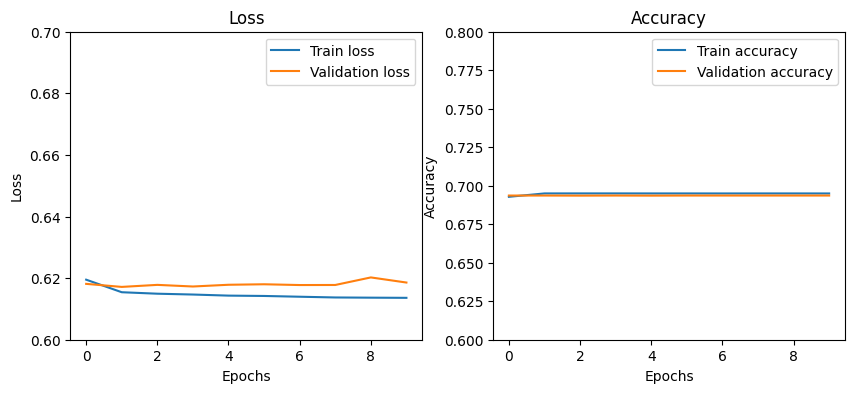

In [160]:
#Visualización loss y accuracy
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(history.history['loss'], label='Train loss')
axs[0].plot(history.history['val_loss'], label='Validation loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_ylim(0.6, 0.7)
axs[1].plot(history.history['accuracy'], label='Train accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim(0.6, 0.8)
axs[1].legend()

**Métricas Modelos**

Modelo Random Forest
- Train: 1.0
- Test: 0.67

Modelo Gradient Boosting
- Train: 0.7
- Test: 0.7

Modelo Gradient Boosting con GridSearch
- Train: 0.7
- Test: 0.7

Modelo Secuencial
- Train loss: 0.61 Train accuracy: 0.70
- Validation loss: 0.62 Validation accuracy: 0.69

Modelo Secuencial con Dropout
- Train loss: 0.61 Train accuracy: 0.70
- Validation loss: 0.62 Validation accuracy: 0.69

**Análisis de Modelos**

Modelo Random Forest
- Este modelo muestra un claro overfitting. Tiene un accuracy perfecto en el conjunto de entrenamiento, pero su desempeño es significativamente más bajo en el conjunto de prueba, lo que indica que ha memorizado los datos de entrenamiento y no generaliza bien a datos nuevos.

Modelo Gradient Boosting
- Presenta buen rendimiento entre los conjuntos de entrenamiento y prueba, lo que indica una buena capacidad para generalizar datos nuevos.


Modelo Gradient Boosting con GridSearch
- Tiene el mismo resultado que el modelo anterior en sus métricas, lo que indica que la búsqueda con GridSearch no mejoró el desempeño del modelo en comparación al modelo de Gradient Boosting sin ajustes adicionales.

Modelo Secuencial
- Muestra un desempeño consistente tanto en el entrenamiento como en la validación. Sin embargo, su accuracy ligeramente más bajo que el del modelo de Gradient Boosting.

Modelo Secuencial con Dropout
- Al igual que el modelo secuencial anterior, también muestra métricas consistentes. Sin embargo, agregar Dropout no ha mejorado su rendimiento.



**Conclusión**

Los modelos secuenciales muestran un buen desempeño pero su accuracy es ligeramente inferior (0.1) en comparación con los modelos de Gradient Boosting en las pruebas de validación.

Los modelos de Gradient Boosting destacan por tener el mejor accuracy en el conjunto de prueba (0.7) y no muestran signos de overfitting. Sus métricas consistentes sugieren que son capaces de generalizar bien a datos nuevos, lo cual es fundamental para realizar predicciones precisas.

A pesar de que el objetivo no tiene correlación con las características actuales, los resultados sugieren que los modelos son capaces de entregar predicciones confiables sobre la satisfacción del cliente.

Para mejorar aún más las predicciones, se recomienda la inclusión de características relacionadas con el objetivo para fortalecer el rendimiento de los modelos y su capacidad predictiva. Esto podría beneficiar tanto la experiencia del cliente como las estrategias empresariales.

Conocer la satisfacción del cliente podría: identificar patrones de insatisfacción, ajustar precios y promociones que mejoren la satisfacción y hagan crecer las ventas, campañas de marketing para retener a los clientes, crear servicios que respondan a la necesidad del cliente, y más.

En conclusión, los modelos de Gradient Boosting son una excelente y confiable opción para predecir la satisfacción del cliente. Son capaces de modelar relaciones complejas, lo que sugiere que tienen potencial para mejorar con características adicionales. Esto no solo permitirá mejorar la experiencia del cliente, sino que también perfeccionará las decisiones estratégicas empresariales y facilitará el desarrollo en distintas áreas del negocio.

